<a href="https://colab.research.google.com/github/jasonyang429/MNIST-digits-classification-with-CNN/blob/main/MNIST_digits_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digits classification with CNN

This notebook includes the steps to download the datasets from kaggle.com and create directories to store the datasets in the notebook.

Here are the few steps to load datasets from kaggle and make directories on the notebook to store them.

1. Log into your account on kaggle.com.
2. Click on the icon on the top-right corner and select "My Account".
3. Scroll down to API and click "Expire API Token", then click on "Create New API Token".
4. The token would be downloaded into your machine.
5. Upload the token in the spaces provided and use the commands below.

In [5]:
# To enable uploading the token from kaggle
! pip install -q kaggle
from google.colab import files

In [7]:
# Upload the token
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
# Creating directories and lists the datasets on kaggle.com
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08            639  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20            357  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59             64  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43            481  
christianlillelund/don

In [9]:
# Download the datasets from kaggle
# ! kaggle competitions download -c "COMPETITION NAME"
! kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 37.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 57.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.2MB/s]
 66% 4.00M/6.09M [00:00<00:00, 41.9MB/s]
100% 6.09M/6.09M [00:00<00:00, 56.1MB/s]


In [10]:
# Creating directories for training and testing sets
# Unzip the datasets downloaded
! mkdir train
! unzip train.csv.zip -d train
! mkdir test
! unzip test.csv.zip -d test

Archive:  train.csv.zip
  inflating: train/train.csv         
Archive:  test.csv.zip
  inflating: test/test.csv           


Here goes our CNN Model.

First, import the neccessary modules and packages.

In [11]:
import csv 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Then, read the files from the directories that we have just created to get the data.

In [12]:
# Creatig lists to append the data from the file
x_train = []
y_train = []

with open('train/train.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    x_train.append(row[1:])
    y_train.append(row[0])

x_test = []

with open('test/test.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    x_test.append(row)
    

Reshape the data as we need the data in the format of:

(NUMBER OF SETS, HEIGHT, WIDTH, CHANNELS)


**Note: 

If it is grayscale image, then it would only have 1 channel. 

Coloured image would have 3 channels which are red, green and blue.

For the labels from datasets, we need to convert it to one-hot encoded matrix, where the one-hot encoded matrix would have "1" on the index of the respective label and "0" on the other index.

For example: 

Label = 2

One-hot encoded matrix for Label = [0, 0, 1, 0, ... , 0, 0]


In [13]:
# Here we reshape our data with np.reshape()

x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Convert y_train into one-hot encoded matrix
y_train = np.array(y_train)
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)


Here I normalized the inputs as the pixel values for grayscale images are 0-255.

Neural networks prefer normalized inputs.

I also split the training sets into training and validation sets for cross validation purpose.

Then, I plotted 9 images from the datasets with their respective labels.

(42000, 28, 28, 1)
(4200, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 37799 + 1) instead
  


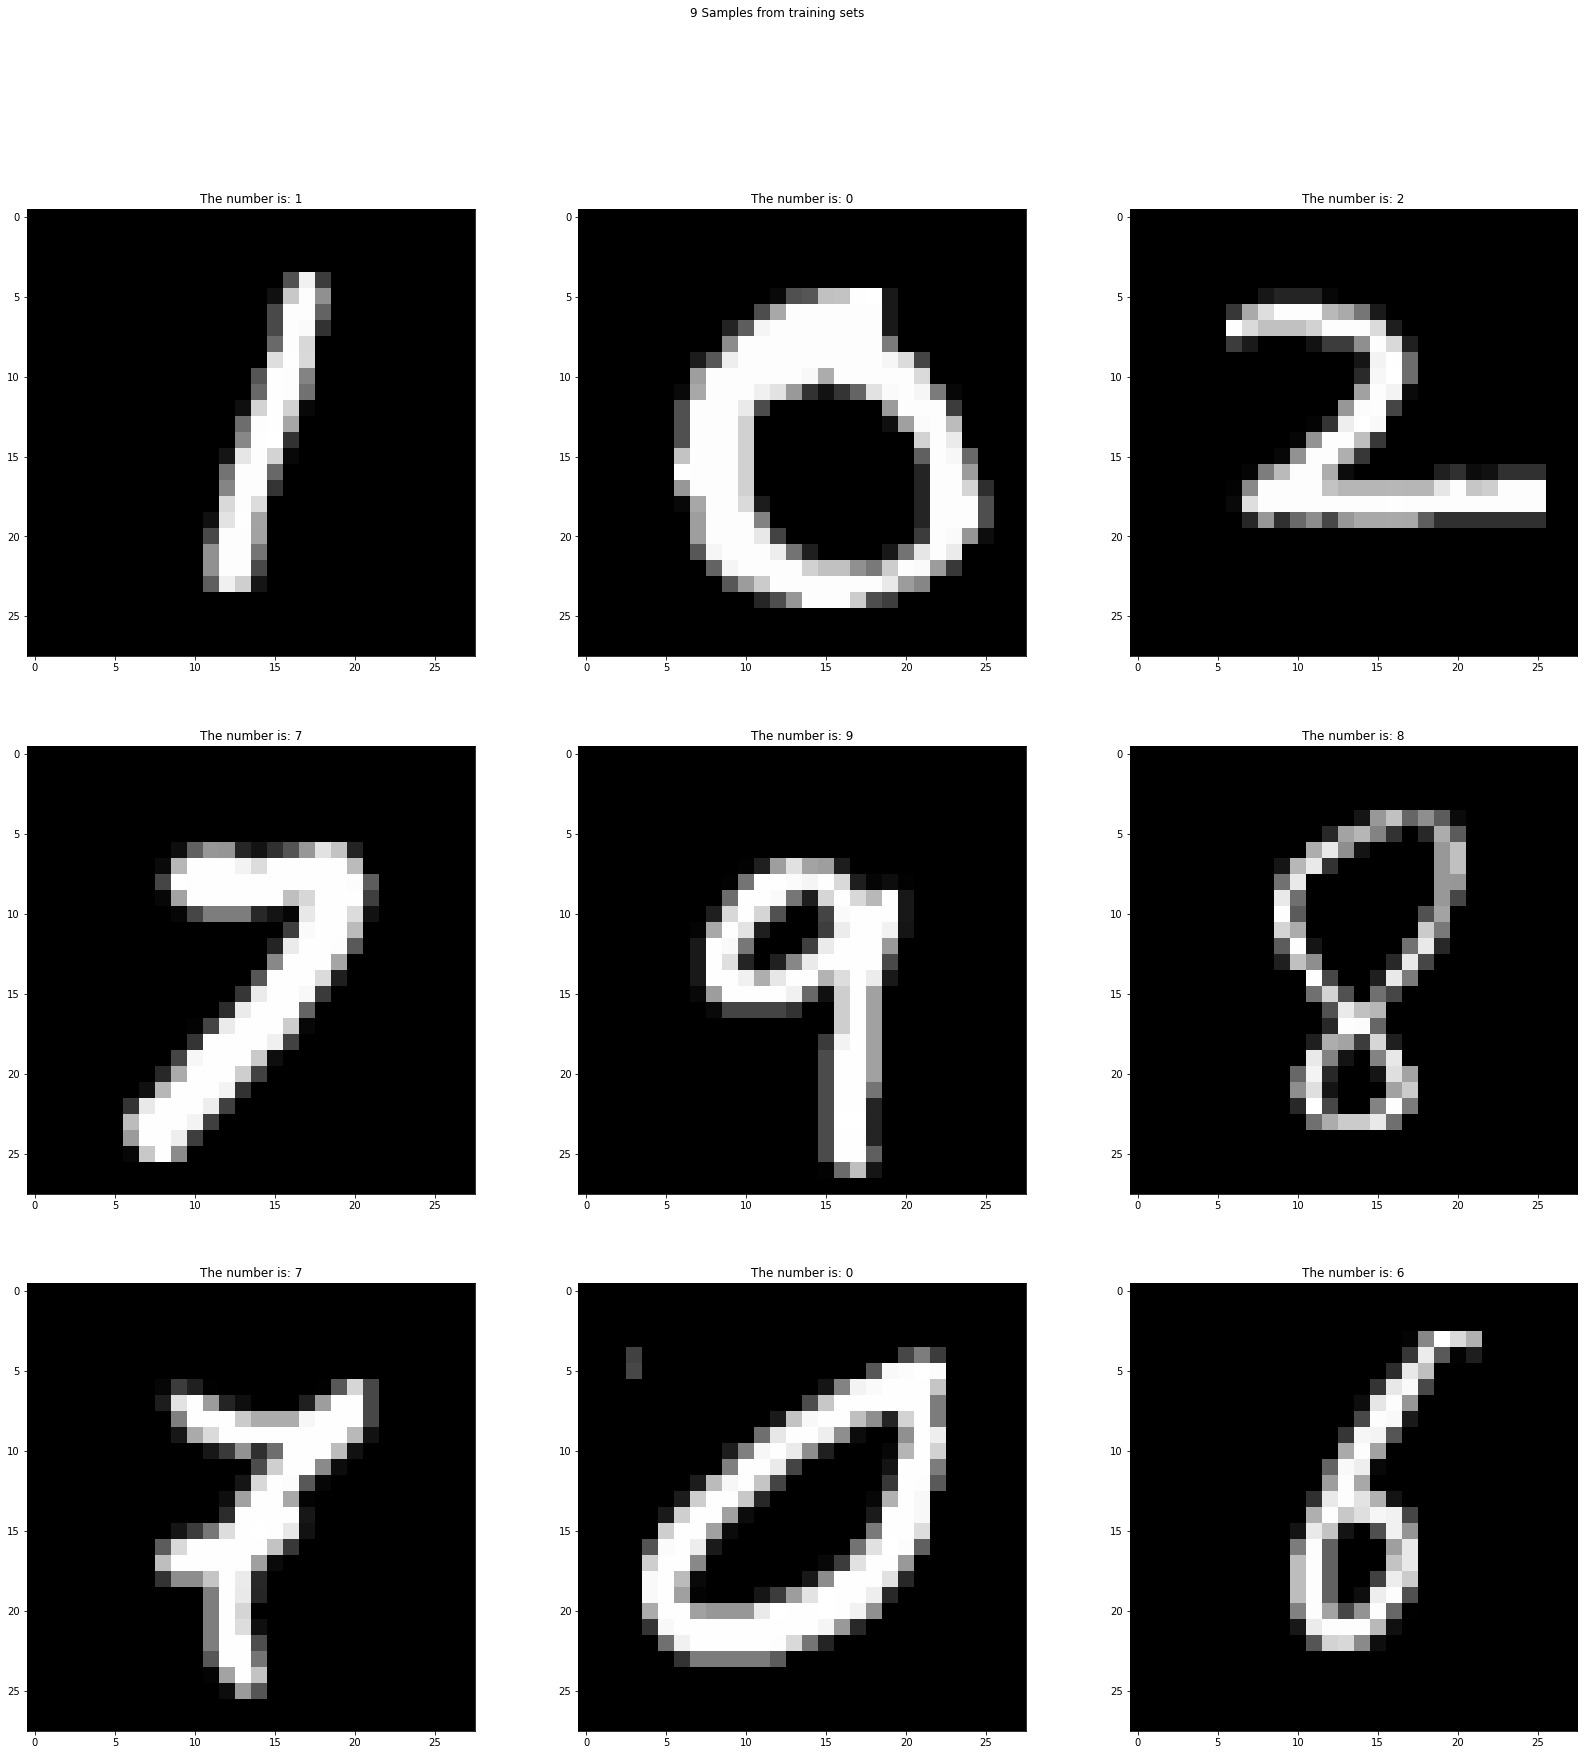

In [14]:
# Normalize the inputs
x_train = x_train.astype(int)/255.
x_test = x_test.astype(int)/255.

# Split the training and validation sets where 90% is training and 10% is validation sets
# 0.9 * 42000 = 37800
split = 37800
x_val = x_train[split:]
x_train = x_train[:split]
y_val_oh = y_train_oh[split:]
y_train_oh = y_train_oh[:split]

# Plotting out 9 random images from datasets
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(28,28))
for i, ax in enumerate(axs.flatten()):
    random_img = np.random.random_integers(0, split-1)
    plt.sca(ax)
    plt.imshow(np.squeeze(x_train[random_img], -1), cmap=plt.get_cmap('gray'))
    plt.title('The number is: {}'.format(y_train[random_img]))

plt.suptitle('9 Samples from training sets')
plt.show()


In [15]:
# Showing neccessary information
print("Number of training sets:", x_train.shape[0])
print("Number of validation sets:", x_val.shape[0])
print("Number of testing sets:", x_test.shape[0])
print("Number of classes:", len(np.unique(y_train)))
print("Input shape:", x_train.shape)
seed = 43
np.random.seed(43)

Number of training sets: 37800
Number of validation sets: 4200
Number of testing sets: 28000
Number of classes: 10
Input shape: (37800, 28, 28, 1)


Here, we would create our Convolutional Neural Network model.

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(256, (3,3), 1, input_shape=[28,28,1]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3,3), 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Prints out the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

Start training the network.

In [19]:
# Add optimizers and loss functions to the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train_oh, epochs=20, verbose=1, validation_data=(x_val, y_val_oh))
# ~99% train accuracy & ~98% validation accuracy with lr = 0.0001
# ~99% train accuracy & ~99% validation accuracy with lr = 0.001

Epoch 1/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.1079 - accuracy: 0.9691 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 2/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0797 - accuracy: 0.9764 - val_loss: 0.0881 - val_accuracy: 0.9771
Epoch 3/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0675 - accuracy: 0.9806 - val_loss: 0.0632 - val_accuracy: 0.9812
Epoch 4/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0653 - val_accuracy: 0.9838
Epoch 5/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0539 - accuracy: 0.9842 - val_loss: 0.0524 - val_accuracy: 0.9867
Epoch 6/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.0735 - val_accuracy: 0.9821
Epoch 7/20
1182/1182 [==============================] - 9s 8ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.0597 - val_accuracy:

Lastly, plot the training accuracy versus the validation accuracy.

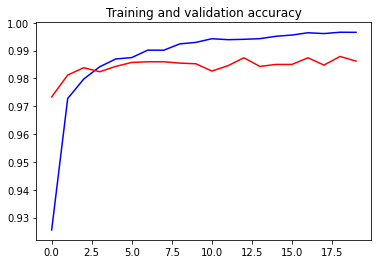

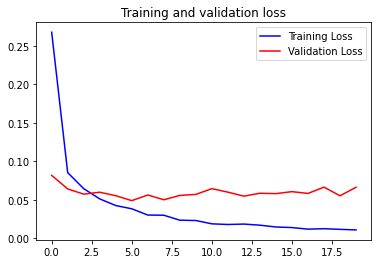

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()